In [1]:
import pygama
import pygama.lh5 as lh5
import matplotlib.pyplot as plt
import numpy as np
import h5py
from pygama.dsp.processors import pole_zero
plt.rcParams['figure.figsize'] = [10, 10]
import json
from scipy.stats import zscore
from scipy.optimize import curve_fit

In [2]:
new_raw = f'/unix/legend/wquinn/discharges/raw_files/ '
sto = lh5.Store() # we require this to read 
fw_new1=f'/unix/legend/wquinn/discharges/raw_files/l200-p06-r007-tst-20230726T000810Z_tier_raw.lh5'

In [3]:
f = open('channel_maps.json','r')
cmap = json.load(f)

In [4]:
targets = ["bege","ppc","icpc","coax"]
matching_targets=[]
for i in targets:
    matching_bege = [key for key, value in cmap.items() if "type" in value and value["type"] == i]
    matching_targets.append(matching_bege)

In [5]:
# Character to add
ch = "ch"

# Use list comprehension to add ch to each element in the array
all_detectors = [ch + element for sublist in matching_targets for element in sublist]

In [6]:
detectors_bege = ['ch1110402', 'ch1110402', 'ch1110402', 'ch1110403', 'ch1110403', 
                         'ch1113600', 'ch1113600', 'ch1113600', 'ch1113600', 'ch1113600', 
                         'ch1113600', 'ch1113600', 'ch1113601', 'ch1113601', 'ch1113601',
                         'ch1113601', 'ch1113601', 'ch1113601', 'ch1113602', 'ch1113602', 
                         'ch1113602', 'ch1113602', 'ch1113602', 'ch1113602', 'ch1113603', 
                         'ch1113603', 'ch1113604', 'ch1113604', 'ch1120003', 'ch1120003', 
                         'ch1120003', 'ch1120003', 'ch1120003', 'ch1120003', 'ch1120003', 
                         'ch1120003', 'ch1120003', 'ch1120003', 'ch1120004', 'ch1120004',
                         'ch1120004', 'ch1120004', 'ch1080000', 'ch1080000', 'ch1080000',
                         'ch1080000', 'ch1080001', 'ch1080001', 'ch1080001', 'ch1083201', 
                         'ch1083201', 'ch1083201', 'ch1083201', 'ch1083201', 'ch1083201',
                         'ch1083201', 'ch1083202', 'ch1083202', 'ch1083202', 'ch1083202',
                         'ch1083203', 'ch1083203', 'ch1083203', 'ch1083203', 'ch1083203', 
                         'ch1083203', 'ch1083204', 'ch1083204', 'ch1083204', 'ch1083205', 
                         'ch1083205', 'ch1083205', 'ch1083205', 'ch1084800', 'ch1084800', 
                         'ch1084800', 'ch1084800', 'ch1084800', 'ch1084801', 'ch1084801', 
                         'ch1084801', 'ch1084801', 'ch1084801', 'ch1084802', 'ch1084802', 
                         'ch1086405','ch1104000', 'ch1104000', 'ch1104000', 'ch1104000', 
                         'ch1104001', 'ch1104001', 'ch1104001', 'ch1104001', 'ch1104002', 
                         'ch1104003', 'ch1104003', 'ch1104003', 'ch1104004', 'ch1105600', 
                         'ch1105600', 'ch1105602', 'ch1105602', 'ch1108802', 'ch1108802', 
                         'ch1108803', 'ch1115201', 'ch1115201', 'ch1115202', 'ch1115202', 
                         'ch1115202', 'ch1115202', 'ch1115202', 'ch1115202', 'ch1115202', 
                         'ch1115202', 'ch1115202', 'ch1115202', 'ch1115202', 'ch1115202', 
                         'ch1116801', 'ch1116801', 'ch1116801', 'ch1116803', 'ch1116803',
                         'ch1116803', 'ch1116803', 'ch1116803', 'ch1116803', 'ch1116803', 
                         'ch1116804', 'ch1116804', 'ch1116804', 'ch1116804', 'ch1116804', 
                         'ch1116804', 'ch1116804', 'ch1116804', 'ch1116804', 'ch1116804',
                         'ch1116804', 'ch1116804', 'ch1116805', 'ch1116805', 'ch1118402', 
                         'ch1118402', 'ch1118402', 'ch1118402', 'ch1118402', 'ch1118402', 
                         'ch1118402', 'ch1118402', 'ch1118403', 'ch1118403', 'ch1118403', 
                         'ch1118403', 'ch1118404', 'ch1118404', 'ch1118404', 'ch1118404', 
                         'ch1120000', 'ch1120000', 'ch1120000', 'ch1120000', 'ch1120000', 
                         'ch1120000', 'ch1120000', 'ch1120000', 'ch1120000', 'ch1120001',
                         'ch1120001', 'ch1120001', 'ch1120001', 'ch1120001', 'ch1120001', 
                         'ch1120001', 'ch1120001', 'ch1120001', 'ch1120001', 'ch1120002',
                         'ch1120002', 'ch1120002', 'ch1121600', 'ch1121600', 'ch1121600',
                         'ch1121600', 'ch1121600', 'ch1121600', 'ch1121600', 'ch1121600', 
                         'ch1121600', 'ch1121601', 'ch1121601', 'ch1121601', 'ch1121601', 
                         'ch1121602', 'ch1121602', 'ch1121602', 'ch1121604', 'ch1121605', 
                         'ch1121605', 'ch1084803', 'ch1084803', 'ch1084805', 'ch1084805',
                         'ch1086400', 'ch1086400', 'ch1086400', 'ch1086400', 'ch1086400', 
                         'ch1086400', 'ch1086401', 'ch1086401', 'ch1086401', 'ch1086401', 
                         'ch1086401', 'ch1086401', 'ch1086401','ch1080005', 'ch1081601', 
                         'ch1081601', 'ch1081601', 'ch1081603', 'ch1081604', 'ch1081604',
                         'ch1089600', 'ch1089600', 'ch1089600', 'ch1089600', 'ch1089600',
                         'ch1107204', 'ch1107204', 'ch1107204', 'ch1107204', 'ch1107204', 
                         'ch1107204', 'ch1107204', 'ch1107204', 'ch1107204', 'ch1107204', 
                         'ch1107204', 'ch1107205', 'ch1107205', 'ch1107205', 'ch1107205', 
                         'ch1107205', 'ch1107205', 'ch1107205', 'ch1107205', 'ch1107205', 
                         'ch1107205', 'ch1107205', 'ch1107205', 'ch1107205', 'ch1107205', 
                         'ch1107205', 'ch1108801', 'ch1120005', 'ch1120005']

In [7]:
tb_data_dict = {}  # Dictionary to store tb_data for each detector
wfs_all_dict = {}  # Dictionary to store wfs_all for each detector

for j in detectors_bege:
    tb_data_dict[j] = sto.read_object(f'/{j}/raw', fw_new1)[0]
    wfs_all_dict[j] = tb_data_dict[j]['waveform']['values'].nda

In [8]:
tb_data_all = {}  # Dictionary to store tb_data for each detector
wfs_all_all = {}  # Dictionary to store wfs_all for each detector

for j in all_detectors:
    tb_data_all[j] = sto.read_object(f'/{j}/raw', fw_new1)[0]
    wfs_all_all[j] = tb_data_all[j]['waveform']['values'].nda

In [9]:
skipped_index1=[1130, 1177, 1361, 51, 393, 37, 88, 130, 467, 827, 962, 1317, 37, 88, 130,
                467, 858, 962, 139, 858, 978, 1265, 1272, 1292, 139, 978, 514, 1161, 62, 
                210, 456, 478, 532, 546, 672, 982, 1200, 1405, 389, 397, 761, 1227, 494,
                501, 1097, 1303, 494, 1097, 1303, 448, 506, 906, 474, 506, 1160, 1402, 32,
                437, 573, 1160, 1224, 1402, 437, 474, 1224, 408, 474, 506, 1313, 408, 444, 
                474, 481, 1129, 444, 474, 481, 791, 1129, 474, 495, 163,764,50, 111, 274,
                345, 464, 594, 782, 811, 945, 989, 990, 1025, 1135, 1174, 1332,643,181, 
                452,77, 179, 725, 908,77, 725, 908, 925,1338,464, 1043, 1338,165,302,
                855,117, 165,643, 672,918,20, 32, 710,120, 143, 495, 774, 943, 1189,
                1270,52, 137, 247, 353, 400, 628, 676, 718, 733, 1126, 1131, 1180,
                474, 995,261, 279, 283, 400, 690, 852, 996, 1292,261, 283, 852, 1327,
                136, 169, 659, 1325,47, 324, 501, 954, 1000, 1085, 1096, 1107, 1342,
                41, 47, 324, 433, 501, 954, 1096, 1107, 1336, 1342,799, 1096, 1151,59,
                436, 499, 562, 675, 789, 909, 1009, 1099,240, 931, 1234, 1363,931, 
                1234, 1363,885,757, 885,474, 495,474, 625,103, 205, 474, 629, 707, 
                1093,194, 340, 474, 515, 707, 722, 1093,554,162, 554, 1242,474]

In [10]:
skipped_waveforms = {'ch1110402': [1130, 1177, 1361],
                     'ch1110403': [51, 393], 
                     'ch1113600': [37, 88, 130, 467, 827, 962, 1317],
                     'ch1113601': [37, 88, 130, 467, 858, 962],
                     'ch1113602': [139, 858, 978, 1265, 1272, 1292],
                     'ch1113603': [139, 978],
                     'ch1113604': [514, 1161], 
                     'ch1120003': [62, 210, 456, 478, 532, 546, 672, 982, 1200, 1405], 
                     'ch1120004': [389, 397, 761, 1227],
                     'ch1080000': [494, 501, 1097, 1303],
                     'ch1080001': [494, 1097, 1303],
                     'ch1083201': [85, 430, 448, 506, 850, 906, 1094],
                     'ch1083202': [474, 506, 1160, 1402], 
                     'ch1083203': [32, 437, 573, 1160, 1224, 1402],
                     'ch1083204': [437, 474, 1224], 
                     'ch1083205': [408, 474, 506, 1313],
                     'ch1084800': [408, 444, 474, 481, 1129], 
                     'ch1084801': [444, 474, 481, 791, 1129],
                     'ch1084802': [474, 495],
                     'ch1086405': [163],
                     'ch1104000': [77, 179, 725, 908],
                     'ch1104001': [77, 725, 908, 925], 
                     'ch1104002': [1338], 
                     'ch1104003': [464, 1043, 1338],
                     'ch1104004': [165],
                     'ch1105600': [302, 855],
                     'ch1105602': [117, 165], 
                     'ch1108802': [643, 672], 
                     'ch1108803': [918], 
                     'ch1115201': [233, 1329],
                     'ch1115202': [5, 60, 90, 151, 180, 215, 270, 281, 289, 829, 944, 1329], 
                     'ch1116801': [20, 32, 710], 
                     'ch1116803': [120, 143, 495, 774, 943, 1189, 1270],
                     'ch1116804': [52, 137, 247, 353, 400, 628, 676, 718, 733, 1126, 1131, 1180],
                     'ch1116805': [474, 995],
                     'ch1118402': [261, 279, 283, 400, 690, 852, 996, 1292], 
                     'ch1118403': [261, 283, 852, 1327], 
                     'ch1118404': [136, 169, 659, 1325],
                     'ch1120000': [47, 324, 501, 954, 1000, 1085, 1096, 1107, 1342],
                     'ch1120001': [41, 47, 324, 433, 501, 954, 1096, 1107, 1336, 1342], 
                     'ch1120002': [799, 1096, 1151], 
                     'ch1121600': [59, 436, 499, 562, 675, 789, 909, 1009, 1099],
                     'ch1121601': [240, 931, 1234, 1363],
                     'ch1121602': [931, 1234, 1363], 
                     'ch1121604': [885],
                     'ch1121605': [757, 885], 
                     'ch1084803': [474, 495],
                     'ch1084805': [474, 625], 
                     'ch1086400': [103, 205, 474, 629, 707, 1093],
                     'ch1086401': [194, 340, 474, 515, 707, 722, 1093],
                     'ch1080005': [554], 
                     'ch1081601': [162, 554, 1242], 
                     'ch1081603': [474], 
                     'ch1081604': [51, 474],
                     'ch1089600': [119, 280, 330, 351, 573],
                     'ch1107204': [94, 100, 304, 345, 445, 668, 764, 908, 949, 1161, 1362],
                     'ch1107205': [50, 111, 274, 345, 464, 594, 782, 811, 945, 989, 990, 1025, 1135, 1174, 1332],
                     'ch1108801': [643],
                     'ch1120005': [181, 452]}

In [14]:
import pandas as pd

# Create an empty DataFrame to store the data
df = pd.DataFrame(columns=['Event', 'Detector name','String','Position'])

def find_common_values(dictionary):
    common_values = {}

    for key, lst in dictionary.items():
        for value in lst:
            if value in common_values:
                common_values[value].append(key)
            else:
                common_values[value] = [key]

    for value, keys in common_values.items():
        if len(keys)>1:
            for j in keys:
                x = j[2:]
                test = cmap[x]['type']
                wfs_all = wfs_all_dict[j]
                wf0 = wfs_all[value, :]
                ts = np.arange(0, wf0.shape[0], 1) * 0.8  # micro s 
                
                
                #plt.plot(ts[:], wf0[:], label=f'{j} which is {test}')  # plot each skipped waveform
                #plt.legend()
            #plt.title(f"The event {value}")
            #plt.show()

    #plt.xlabel('Time ($\mu s$)')
    #plt.ylabel('Voltage (mV)')


find_common_values(skipped_waveforms)

In [12]:
excel_filename = 'all_multi.xlsx'
df.to_excel(excel_filename, index=False)

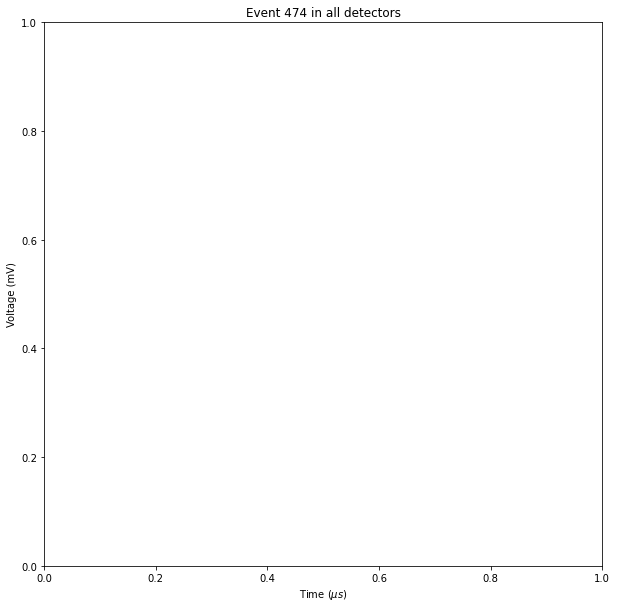

In [15]:
for i in skipped_index1:
    for j in all_detectors:
        wfs_all = wfs_all_all[j]
        wf0 = wfs_all[i, :]
        ts = np.arange(0, wf0.shape[0], 1) * 0.8  # micro s 
        #plt.plot(ts[:], wf0[:])  # plot each skipped waveform

    #plt.xlabel('Time ($\mu s$)')
    #plt.ylabel('Voltage (mV)')
    #plt.title(f'Event {i} in all detectors')
    #plt.show()
